# 导入库

In [1]:
#coding:utf-8
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
%matplotlib inline

# 导入数据集

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) #MNIST数据输入

W0829 10:37:44.431263 12720 deprecation.py:323] From d:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-images-idx3-ubyte.gz


W0829 10:37:44.709223 12720 deprecation.py:323] From d:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0829 10:37:44.722234 12720 deprecation.py:323] From d:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0829 10:37:44.785238 12720 deprecation.py:323] From d:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

# 输入图像大小是 28x28 大小
X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

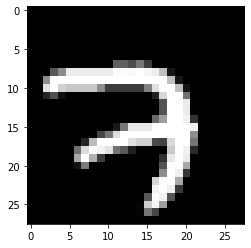

In [8]:
plt.imshow(X_train[0].reshape((28, 28)), cmap='gray')

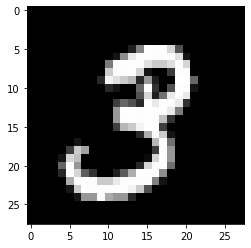

In [9]:
plt.imshow(X_train[1].reshape((28, 28)), cmap='gray')

# 构建模型

In [14]:
# Importing the Keras libraries and packages
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

Using TensorFlow backend.


In [25]:
def build_classifier():
    # Initialising the CNN
    classifier = Sequential()

    # Adding the first CNN layer and some Dropout regularisation
    classifier.add(Conv2D(filters = 2, kernel_size = 3, strides = 1, padding = "SAME", activation = "relu", input_shape = (28, 28, 1)))
    classifier.add(MaxPooling2D(pool_size=(2, 2),  padding='SAME'))
    classifier.add(Dropout(0.3))

    classifier.add(Conv2D(filters = 2, kernel_size = 3, strides = 1, padding = "SAME", activation = "relu"))
    classifier.add(MaxPooling2D(pool_size=(2, 2),  padding='SAME'))
    classifier.add(Dropout(0.3))

    classifier.add(Flatten())
    classifier.add(Dense(kernel_initializer="uniform", units = 4))

    # Adding the output layer
    classifier.add(Dense(kernel_initializer="uniform", units = 10, activation="softmax"))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

    return classifier


In [26]:
classifier = build_classifier()
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 2)         20        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 2)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 2)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 2)         38        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 2)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 2)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 98)                0         
__________

# 训练模型

In [27]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='minions.hdf5', verbose=1, save_best_only=True, monitor='val_loss',mode='min')

In [28]:
history = classifier.fit(X_train, y_train, epochs = 50, batch_size = 50, validation_data=(X_test, y_test), callbacks=[checkpointer])

Train on 55000 samples, validate on 10000 samples
Epoch 1/50
55000/55000 [==============================] - 10s 178us/step - loss: 1.3555 - acc: 0.5203 - val_loss: 0.8780 - val_acc: 0.7317

Epoch 00001: val_loss improved from inf to 0.87800, saving model to minions.hdf5
Epoch 2/50
55000/55000 [==============================] - 9s 171us/step - loss: 1.0732 - acc: 0.6216 - val_loss: 0.8069 - val_acc: 0.7405

Epoch 00002: val_loss improved from 0.87800 to 0.80690, saving model to minions.hdf5
Epoch 3/50
55000/55000 [==============================] - 9s 172us/step - loss: 1.0243 - acc: 0.6383 - val_loss: 0.7807 - val_acc: 0.7610

Epoch 00003: val_loss improved from 0.80690 to 0.78067, saving model to minions.hdf5
Epoch 4/50
55000/55000 [==============================] - 9s 172us/step - loss: 0.9878 - acc: 0.6533 - val_loss: 0.7382 - val_acc: 0.7770

Epoch 00004: val_loss improved from 0.78067 to 0.73821, saving model to minions.hdf5
Epoch 5/50
55000/55000 [==============================] -


Epoch 00040: val_loss did not improve from 0.37016
Epoch 41/50
55000/55000 [==============================] - 9s 166us/step - loss: 0.6202 - acc: 0.7912 - val_loss: 0.3847 - val_acc: 0.8881

Epoch 00041: val_loss did not improve from 0.37016
Epoch 42/50
55000/55000 [==============================] - 9s 170us/step - loss: 0.6162 - acc: 0.7936 - val_loss: 0.3791 - val_acc: 0.8903

Epoch 00042: val_loss did not improve from 0.37016
Epoch 43/50
55000/55000 [==============================] - 10s 174us/step - loss: 0.6174 - acc: 0.7920 - val_loss: 0.3777 - val_acc: 0.8899

Epoch 00043: val_loss did not improve from 0.37016
Epoch 44/50
55000/55000 [==============================] - 9s 173us/step - loss: 0.6199 - acc: 0.7920 - val_loss: 0.3805 - val_acc: 0.8934

Epoch 00044: val_loss did not improve from 0.37016
Epoch 45/50
55000/55000 [==============================] - 9s 166us/step - loss: 0.6163 - acc: 0.7916 - val_loss: 0.3764 - val_acc: 0.8931

Epoch 00045: val_loss did not improve from 

# 查看训练过程

In [19]:
def plot_history(history) :
    SMALL_SIZE = 20
    MEDIUM_SIZE = 22
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    fig = plt.figure()
    fig.set_size_inches(15,10)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'],loc='upper left')
    plt.show()

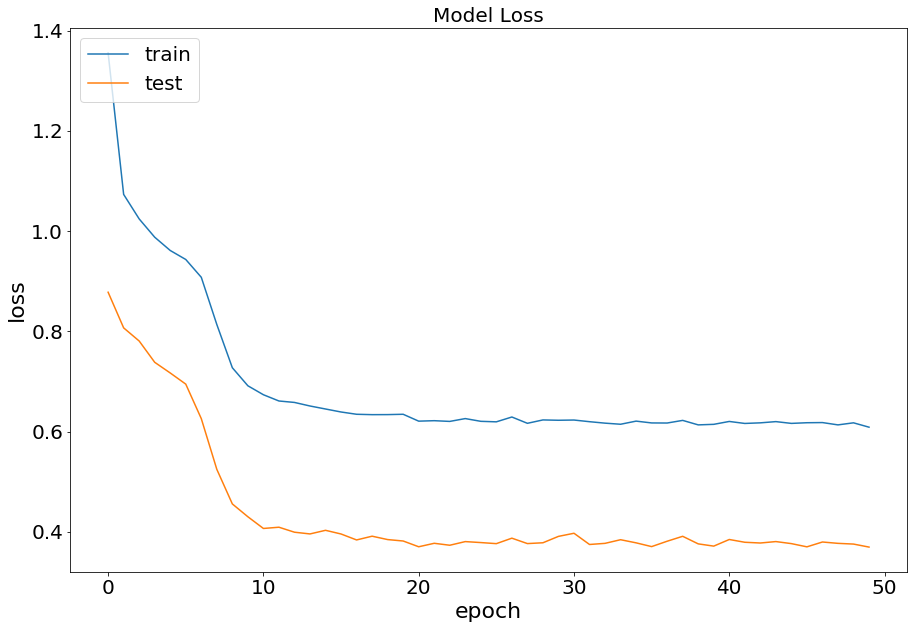

In [29]:
plot_history(history.history)

# 保存模型

保存为 Keras 模型

In [30]:
classifier.save("mnist.h5")

保存为 onnx 模型

In [31]:
import onnx
import keras2onnx

In [32]:
onnx_model = keras2onnx.convert_keras(classifier, 'mnist')
onnx.save_model(onnx_model, 'mnist.onnx')

# 加载训练好的模型

In [33]:
import onnxruntime as rt
sess = rt.InferenceSession("mnist.onnx")

In [34]:
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name

In [36]:
res = sess.run([output_name], {input_name: X_test})
res = np.array(res)

[0.00000001 0.00000004 0.0000312  0.00062566 0.         0.0000002
 0.         0.99688894 0.00009035 0.00236361]


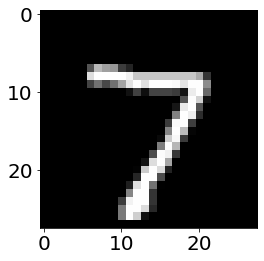

In [44]:
plt.imshow(X_test[0].reshape((28, 28)), cmap='gray')
print(res[0][0])